In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 처음 5개의 행을 출력
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [7]:
# 학습 Data - 농어의 모든 특성 - 길이, 높이, 너비

# 학습 Data로 가공하기 위해 Numpy 변환

In [6]:
import numpy as np

# DataFrame -> Numpy Array
perch_full = df.to_numpy()

# 학습 Data
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [8]:
# Target Data - 농어의 무게
# 농어의 길이, 높이, 너비의 특성을 가지고 무게를 예측

In [10]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [11]:
# 학습 Set & Test Set 분리

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [19]:
print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


In [22]:
# 특성 공학 - 특성을 조합해서 새로운 특성 여러개를 만들어 주는 방법, 최적의 특성

# PolynomialFeatures - 특성 조합 편의 Class

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
# include_bias = 절편에 곱해지는 1은 제외
poly = PolynomialFeatures(include_bias=False)

# 2와 3을 원재료로 조합해 새로운 특성 추가
poly.fit([[2, 3]])

result = poly.transform([[2, 3]])
# [[1. 2. 3. 4. 6. 9.]]
# [[1추가, 2, 3, 2**, 2 + 3, 3**]]

print(result)

[[2. 3. 4. 6. 9.]]


In [33]:
# 특성 조합 공식 확인

poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [39]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)

train_poly = poly.transform(train_input)

# 기존 3개 특성 -> 9개로 변경
print(train_poly.shape)

(42, 9)


In [42]:
test_poly = poly.transform(test_input)

print(test_poly.shape)

(14, 9)


In [44]:
# 다중 회귀 모델 훈련 - 선형 회귀로 예측

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 지도 학습
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

0.9930190324842829


In [48]:
print(lr.score(test_poly, test_target))

0.9651609299748076


In [49]:
# 무조건 특성 조합이 많을 수록 예측 결정 계수가 높아질까?
# -> X

In [50]:
# dergree = 차수, 특성의 최대 조합 차수를 5차 x^5
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)

train_poly = poly.transform(train_input)

test_poly = poly.transform(test_input)

In [52]:
print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [54]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

0.9999999999954993


In [56]:
# 과대 적합

print(lr.score(test_poly, test_target))

-99.45010044565693


In [58]:
# 과대 적합
# -> 규제 -> 훈련 세트의 결정 계수는 낮추고, 테스트 세트의 결정 계수는 높임

In [64]:
# 특정 특성에 편향된 규제를 하지 않기 위해서
# 훈련 세트, 테스트 세트 -> 표준 점수

In [65]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [145]:
# Ridge - 대표적 선형 회귀 모델

In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

0.991078608223752


In [70]:
print(ridge.score(test_scaled, test_target))

0.9763361003822727


In [71]:
# 최적의 alpha 값 찾기 - 하이퍼 파라미터

In [76]:
# 훈련 세트 결정 계수
train_score = []

# 테스트 세트 결정 계수
test_score = []

# 규제 강도
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :
    
    # 규제 강도(alpha)를 달리해서 Ridge 모델 객체 생성
    ridge = Ridge(alpha = alpha)

    # 훈련
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [78]:
print(train_score)

[0.9948522062320859, 0.9942367943322912, 0.9931165749555343, 0.991078608223752, 0.9896236632208706, 0.9848493419119386]


In [80]:
print(test_score)

[0.9648054383459003, 0.9693773416438248, 0.9748902929600831, 0.9763361003822727, 0.9705256718994301, 0.9625645679888172]


In [81]:
# 산포도

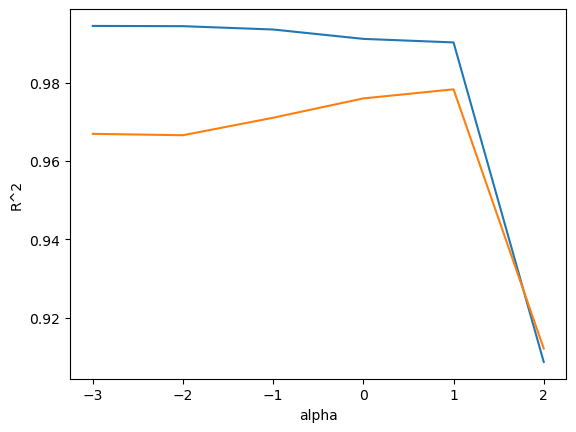

In [146]:
import matplotlib.pyplot as plt

# Numpy의 log 함수
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')

# 결졍 계수
plt.ylabel('R^2')

plt.show()

# alpha가 작은쪽은 과대 적합, 큰쪽은 과소 적합
# 최적의 alpha 값 = 0 -> 1

In [105]:
ridge = Ridge(alpha = 1)

ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.991078608223752
0.9763361003822727


In [147]:
# Lasso - 규제 선형 모델

In [110]:
from sklearn.linear_model import Lasso

# 반복 횟수, defualt 1000, 1000 보다 낮으면 경고
lasso = Lasso(max_iter = 100000)

lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))

0.9911508247348029


In [112]:
print(lasso.score(test_scaled, test_target))

0.9759626158948101


In [126]:
# 훈련 세트 결정 계수
train_score = []

# 테스트 세트 결정 계수
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :

    # 규제별 Lasso 모델 객체
    lasso = Lasso(alpha = alpha, max_iter = 10000)

    # 훈련
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

D:\mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+04, tolerance: 5.152e+02
  model = cd_fast.enet_coordinate_descent(
D:\mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.651e+03, tolerance: 5.152e+02
  model = cd_fast.enet_coordinate_descent(
D:\mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.283e+02, tolerance: 5.152e+02
  model = cd_fast.enet_coordinate_desc

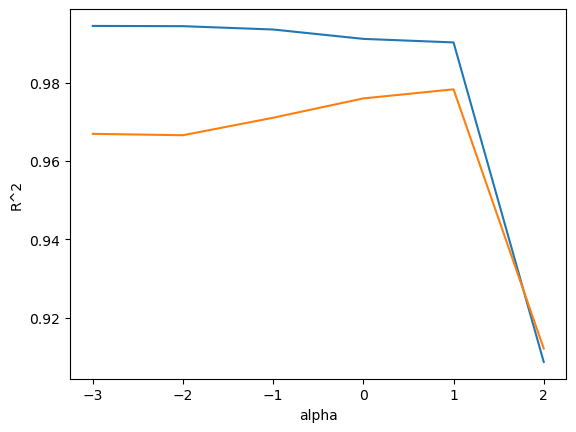

In [129]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

# 최적의 alpha 값 = 1 -> 10

In [132]:
lasso = Lasso(alpha = 10, max_iter = 10000)

# 훈련
lasso.fit(train_scaled, train_target)

# 훈련 세트 결정 계수
print(lasso.score(train_scaled, train_target))

# 테스트 세트 결정 계수
print(lasso.score(test_scaled, test_target))

0.9902485440562799
0.9782758909771148


In [134]:
print(train_scaled.shape)

(42, 55)


In [140]:
# 사용된 특성 개수 구하기

In [142]:
# 가중치, 기울기

lasso.coef_

# 0 = 안쓰는 특성

array([  0.        ,   0.        ,   0.        ,  40.91328081,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  52.58339328,   0.        ,
       186.67665369,   0.        ,   0.        ,  10.55622634,
         0.        ,   0.        ,  49.90544501,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [144]:
# 가중치가 0이 된 총 합계
# -> 특성 중에서 사용되지 않은 특성의 개수
np.sum(lasso.coef_ == 0)

# 총 55개의 특성중 50개를 뺀 5개만 사용

50